#### Data Preprocessing 

In [73]:
# Importing necessary modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [74]:
data=pd.read_csv('BodyFat.csv')
data.columns = map(str.lower, data.columns)
data.head()

,idno,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [75]:
# Overview of the Data 
data.describe()

,idno,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,18.938492,1.055574,44.884921,178.924405,70.148810,25.436905,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,72.890329,7.750856,0.019031,12.602040,29.389160,3.662856,3.648111,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,1.000000,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,63.750000,12.800000,1.041400,35.750000,159.000000,68.250000,23.100000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,126.500000,19.000000,1.054900,43.000000,176.500000,70.000000,25.050000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,189.250000,24.600000,1.070400,54.000000,197.000000,72.250000,27.325000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,252.000000,45.100000,1.108900,81.000000,363.150000,77.750000,48.900000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [76]:
# Dropping IDNO from the data 
data = data.drop(columns=['idno'])

In [77]:
# Checking for missing values
data.isnull().sum()

bodyfat      0
density      0
age          0
weight       0
height       0
adiposity    0
neck         0
chest        0
abdomen      0
hip          0
thigh        0
knee         0
ankle        0
biceps       0
forearm      0
wrist        0
dtype: int64

/var/folders/qq/03sjdbt93vn87r2lrkqk8mb40000gq/T/ipykernel_38861/3703711382.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bodyfat)


<Axes: title={'center': 'Body Fat'}, xlabel='bodyfat', ylabel='Density'>

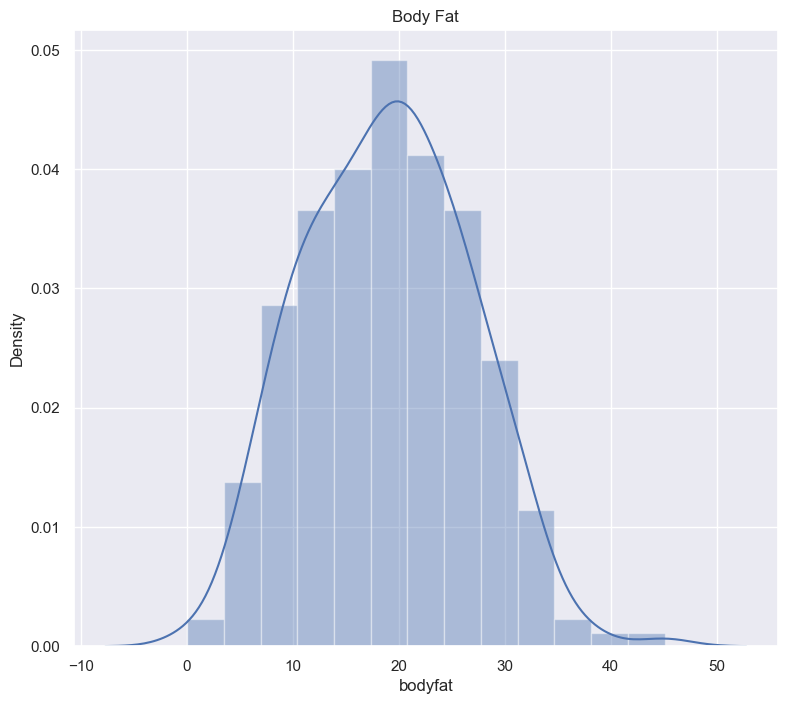

In [78]:
# Visualising the dependent variable (BODYFAT)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Body Fat')
sns.distplot(data.bodyfat)


#### Convert height and weight to SI unit and then calculate the Body-Mass Index

In [79]:
# converting weight from lbs to kg
data['weight_kg'] = data.weight / 2.2 
# converting height from inches to m 
data['height_m'] = data.height * 0.025

#calculating bmi for verification
data['bmi'] = data.weight_kg / (data.height_m ** 2) 

#rounding the value to 1 decimal
data.weight_kg = round(data.weight_kg, 1)
data.height_m = round(data.height_m, 1)
data.bmi = round(data.bmi, 1)

In [80]:
# data.describe()
data.head()

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,weight_kg,height_m,bmi
0,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,70.1,1.7,24.4
1,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,78.8,1.8,24.1
2,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,70.0,1.7,25.5
3,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,84.0,1.8,25.7
4,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,83.8,1.8,26.4


### Observation : The dependent variable is normally distributed 

#### Given the data and discussion in the class we already know that the data contains few outliers and absurd values 
#### We know that from our description of the data the minimum value for BodyFat is "0" which is not possible 
#### Hence we need to handle outliers 

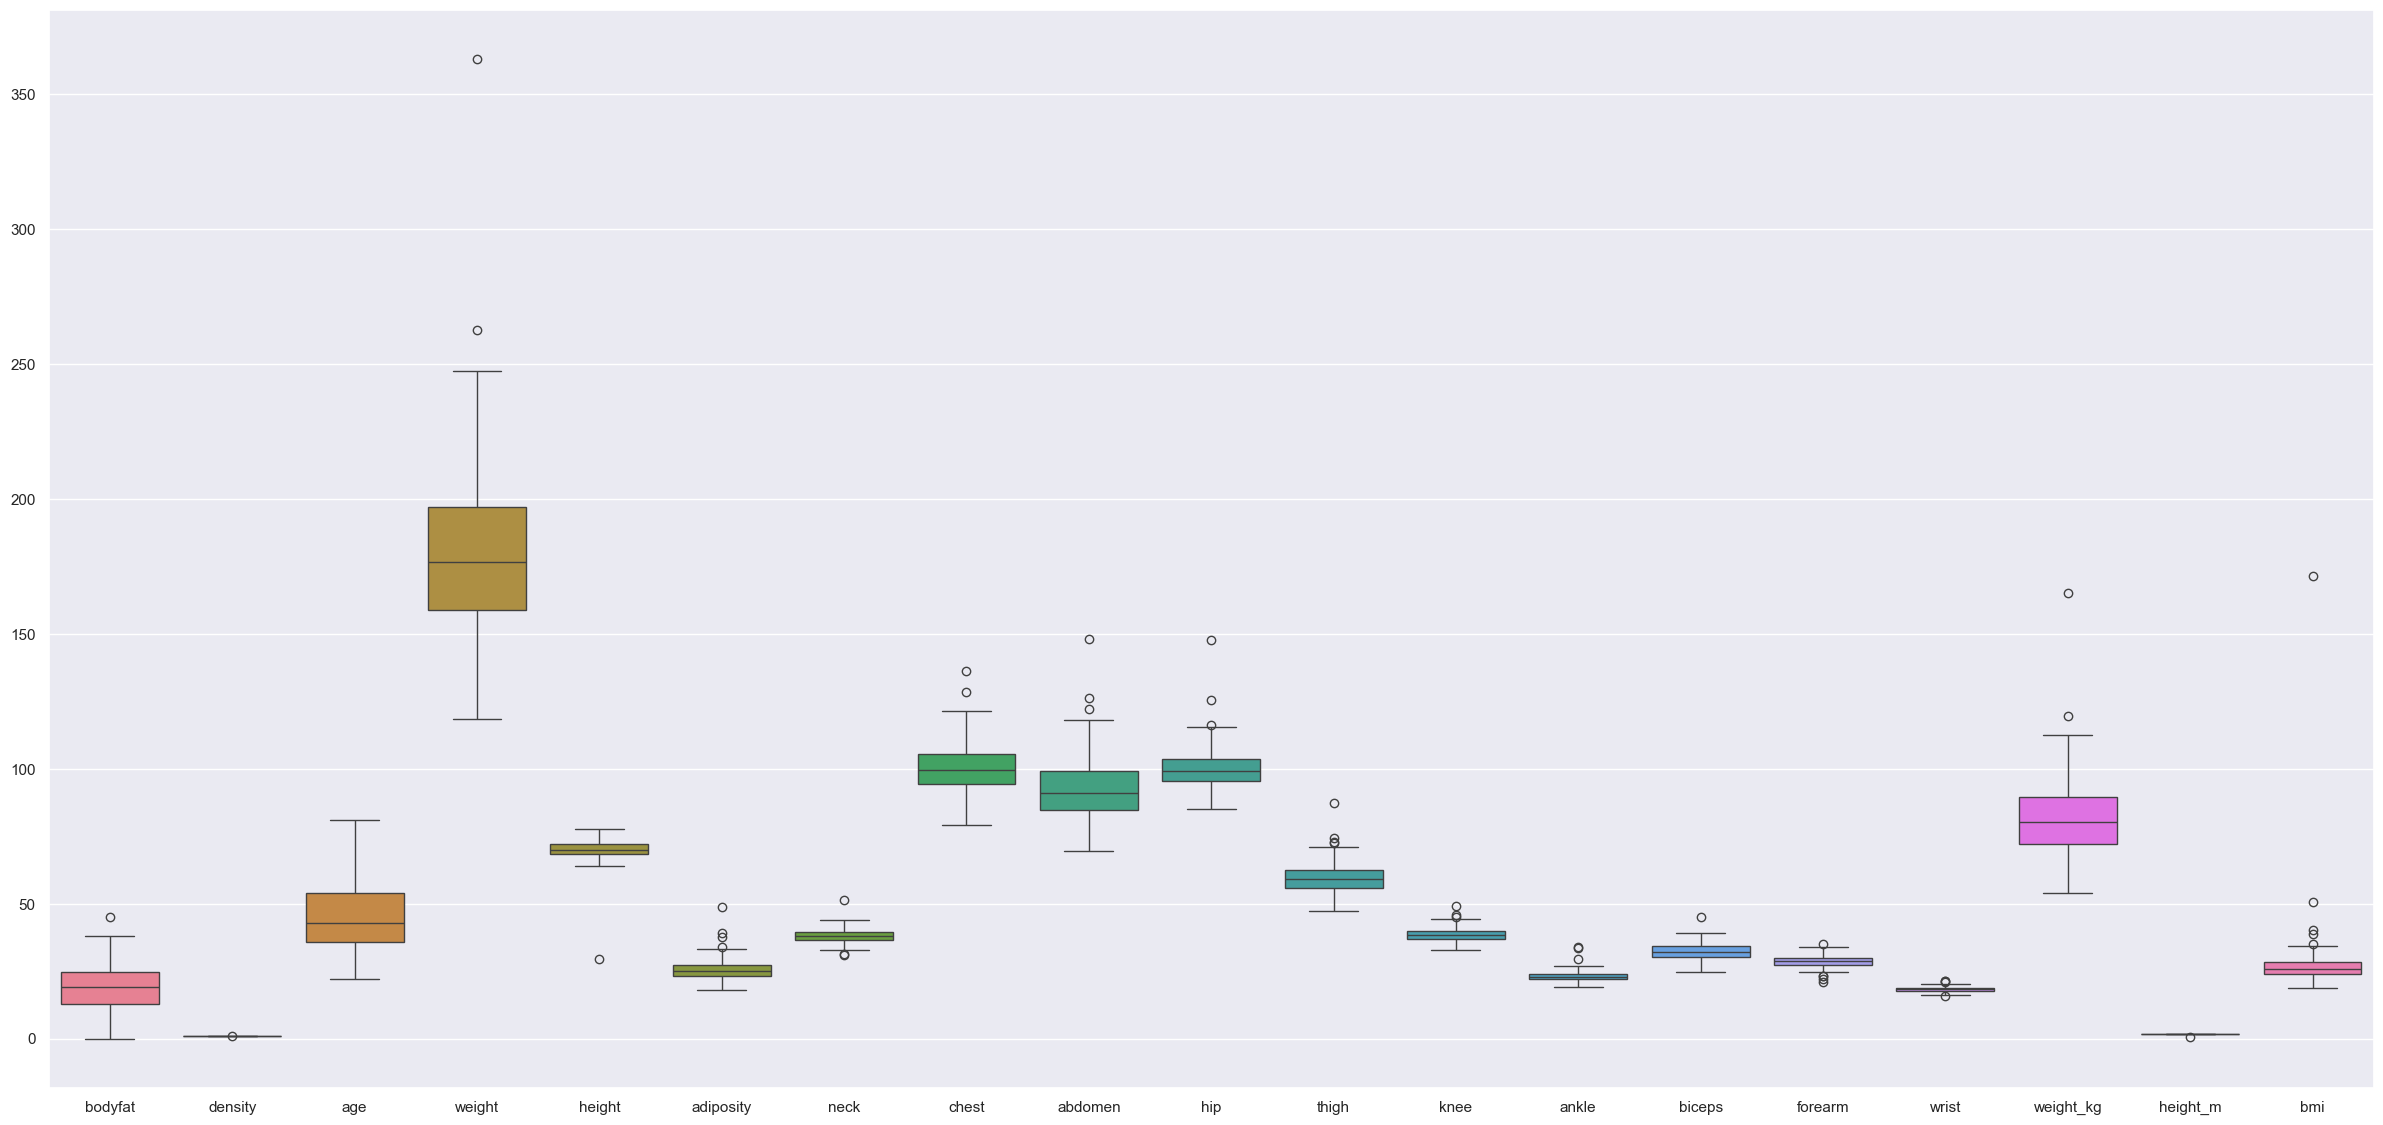

In [81]:
# Using bloxplots to find outliers 
plt.figure(figsize=(30,14))
sns.boxplot(data=data)
plt.show()


#### Performing outlier detection 

#### Principles of the Normal Distribution and the empirical rule (68–95–99 rule)

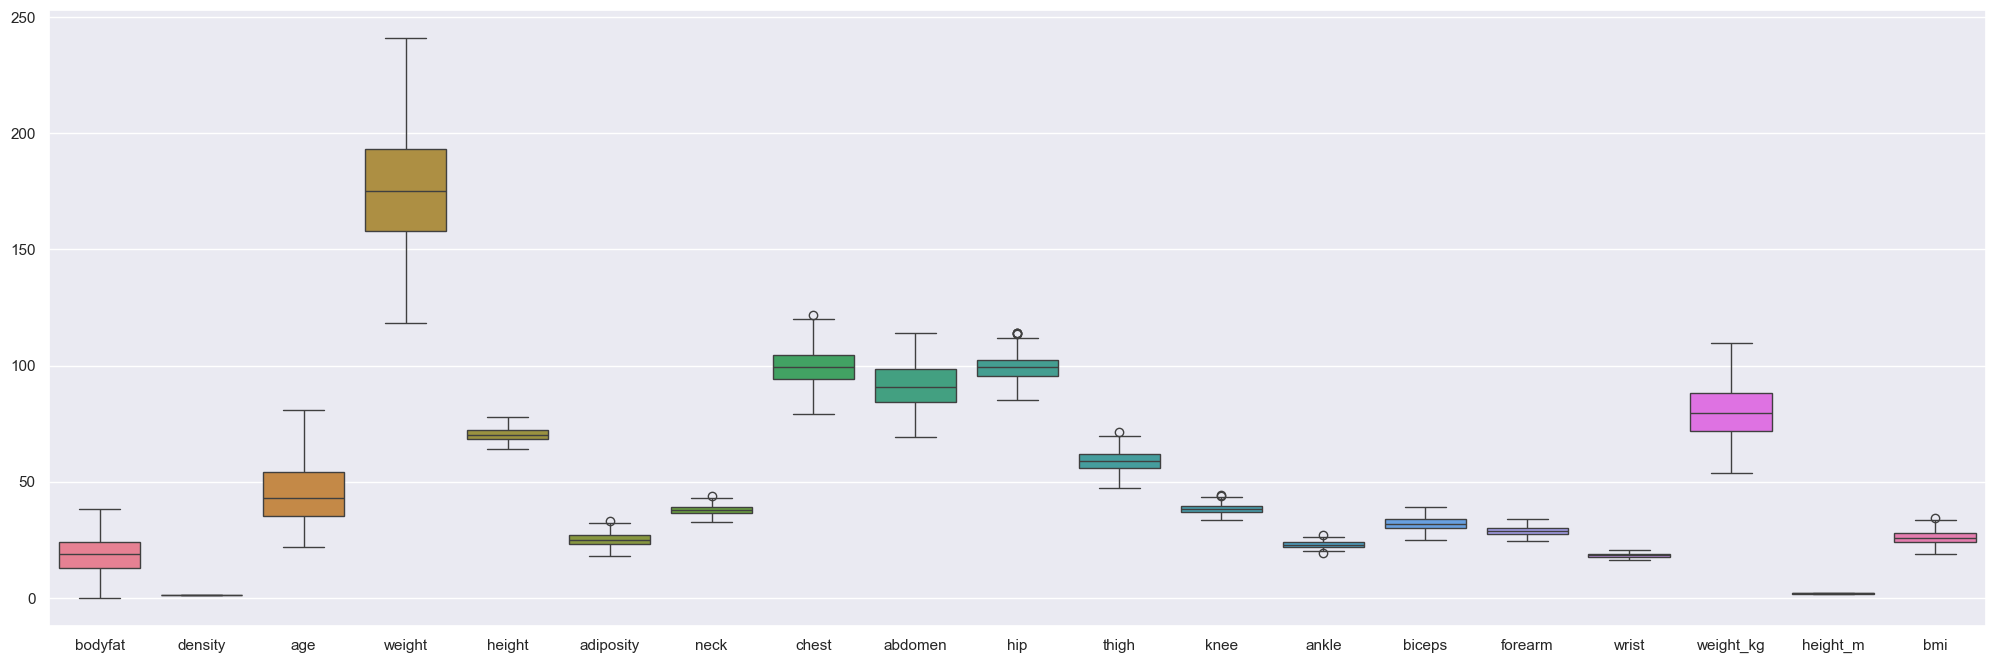

In [82]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

final_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(25,8))
sns.boxplot(data=final_data)
plt.show()

In [83]:
final_data.describe()

,bodyfat,density,age,weight,height,adiposity,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,weight_kg,height_m,bmi
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,18.371674,1.056928,44.759657,176.307082,70.302575,25.073820,37.872532,100.163948,91.561373,99.201288,59.029614,38.428326,22.922747,32.117167,28.654506,18.170815,80.139914,1.756223,25.906009
std,7.253338,0.017941,12.543466,24.601578,2.575409,2.936299,2.126946,7.507668,9.214211,5.742818,4.511396,2.152678,1.277810,2.806605,1.791885,0.836767,11.181481,0.071724,3.053878
min,0.000000,1.010100,22.000000,118.500000,64.000000,18.100000,32.800000,79.300000,69.400000,85.000000,47.200000,33.400000,19.100000,24.800000,24.600000,16.300000,53.900000,1.600000,18.600000
25%,12.700000,1.043000,35.000000,158.000000,68.250000,23.100000,36.400000,94.200000,84.400000,95.400000,56.000000,36.900000,22.000000,30.200000,27.300000,17.600000,71.800000,1.700000,23.800000
50%,18.600000,1.056000,43.000000,175.250000,70.250000,24.800000,37.900000,99.500000,90.800000,99.200000,58.900000,38.400000,22.700000,31.800000,28.700000,18.200000,79.700000,1.800000,25.600000
75%,24.000000,1.070600,54.000000,193.500000,72.250000,26.800000,39.200000,104.700000,98.600000,102.500000,61.900000,39.700000,23.800000,34.000000,30.000000,18.800000,88.000000,1.800000,27.800000
max,38.200000,1.108900,81.000000,241.250000,77.750000,33.200000,43.900000,121.600000,113.900000,114.100000,71.200000,44.200000,27.000000,39.100000,33.700000,20.400000,109.700000,1.900000,34.300000


#### Checking Correlation 

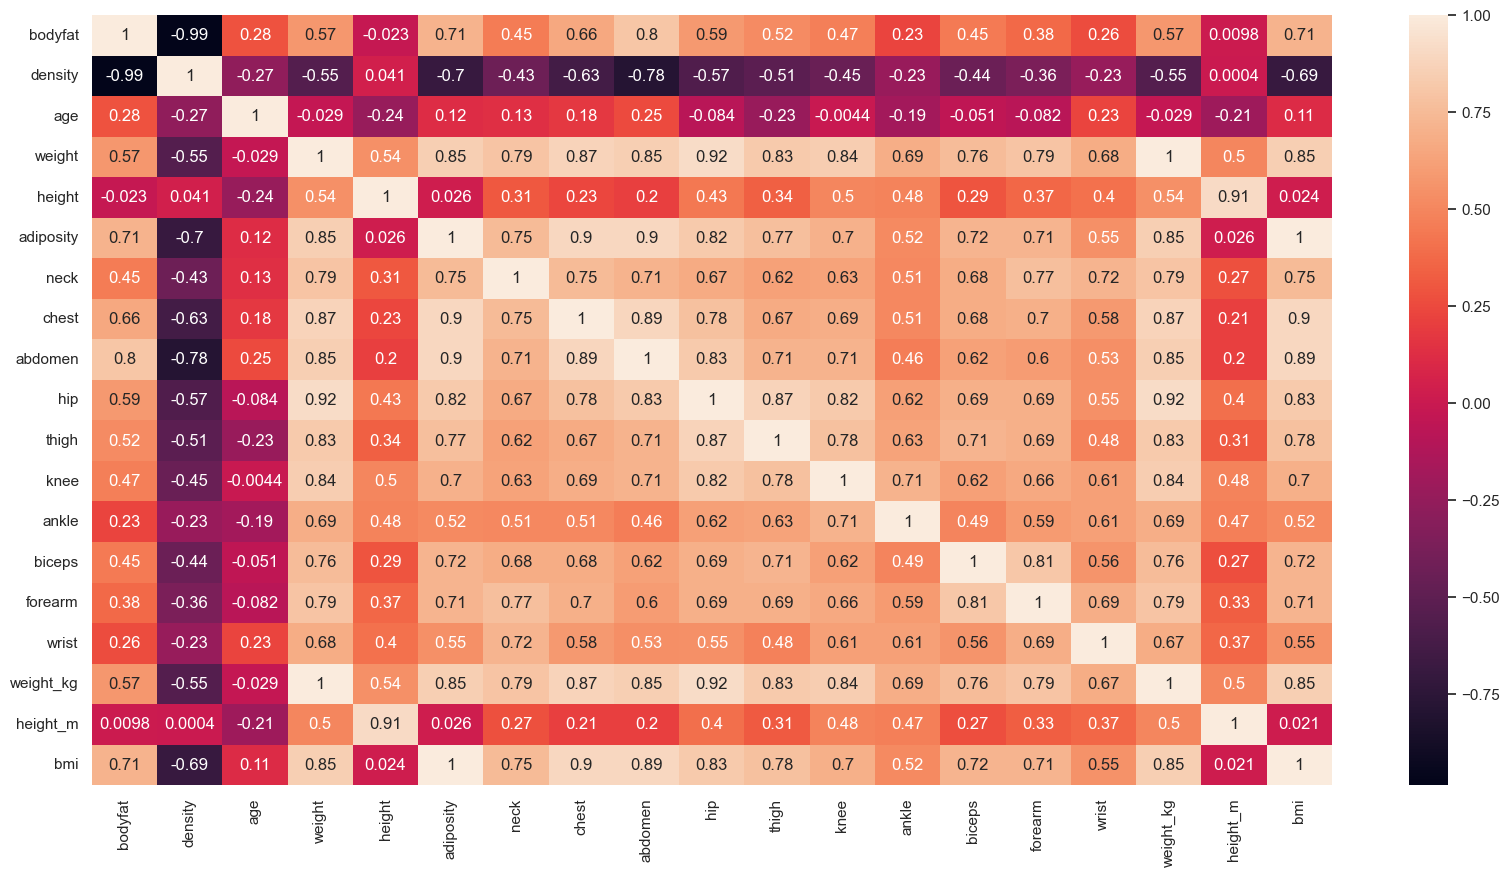

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True)
plt.show()

In [85]:
# abdomen and chest 0.89. Drop one.
# drop density.
# Forearm and Biceps also 0.81. Drop one.
# Dropping height and weight from our analysis since we have BMI.
# BMI highly correlated with Chest: 0.90 , Abdomen : 0.89
# Thigh and HIP : 0.87

In [86]:
final_data.columns

Index(['bodyfat', 'density', 'age', 'weight', 'height', 'adiposity', 'neck',
       'chest', 'abdomen', 'hip', 'thigh', 'knee', 'ankle', 'biceps',
       'forearm', 'wrist', 'weight_kg', 'height_m', 'bmi'],
      dtype='object')

In [87]:
final_data.drop(columns=['density','abdomen','weight','thigh','forearm','height','height_m','weight_kg'],axis=1,inplace=True)

/var/folders/qq/03sjdbt93vn87r2lrkqk8mb40000gq/T/ipykernel_38861/2108380142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop(columns=['density','abdomen','weight','thigh','forearm','height','height_m','weight_kg'],axis=1,inplace=True)


In [88]:
final_data

,bodyfat,age,adiposity,neck,chest,hip,knee,ankle,biceps,wrist,bmi
0,12.6,23,23.7,36.2,93.1,94.5,37.3,21.9,32.0,17.1,24.4
1,6.9,22,23.4,38.5,93.6,98.7,37.3,23.4,30.5,18.2,24.1
2,24.6,22,24.7,34.0,95.8,99.2,38.9,24.0,28.8,16.6,25.5
3,10.9,26,24.9,37.4,101.8,101.2,37.3,22.8,32.4,18.2,25.7
4,27.8,24,25.6,34.4,97.3,101.9,42.2,24.0,32.2,17.7,26.4
...,...,...,...,...,...,...,...,...,...,...,...
246,29.1,69,30.5,40.8,113.7,110.0,44.0,22.6,37.5,18.8,31.5
247,11.5,70,21.1,34.9,89.2,88.8,34.8,21.5,25.6,18.5,21.8
248,32.3,72,29.1,40.9,108.5,104.5,40.8,23.2,35.2,20.1,30.0
249,28.3,72,30.2,38.9,111.1,101.7,37.3,21.5,31.3,18.0,31.2


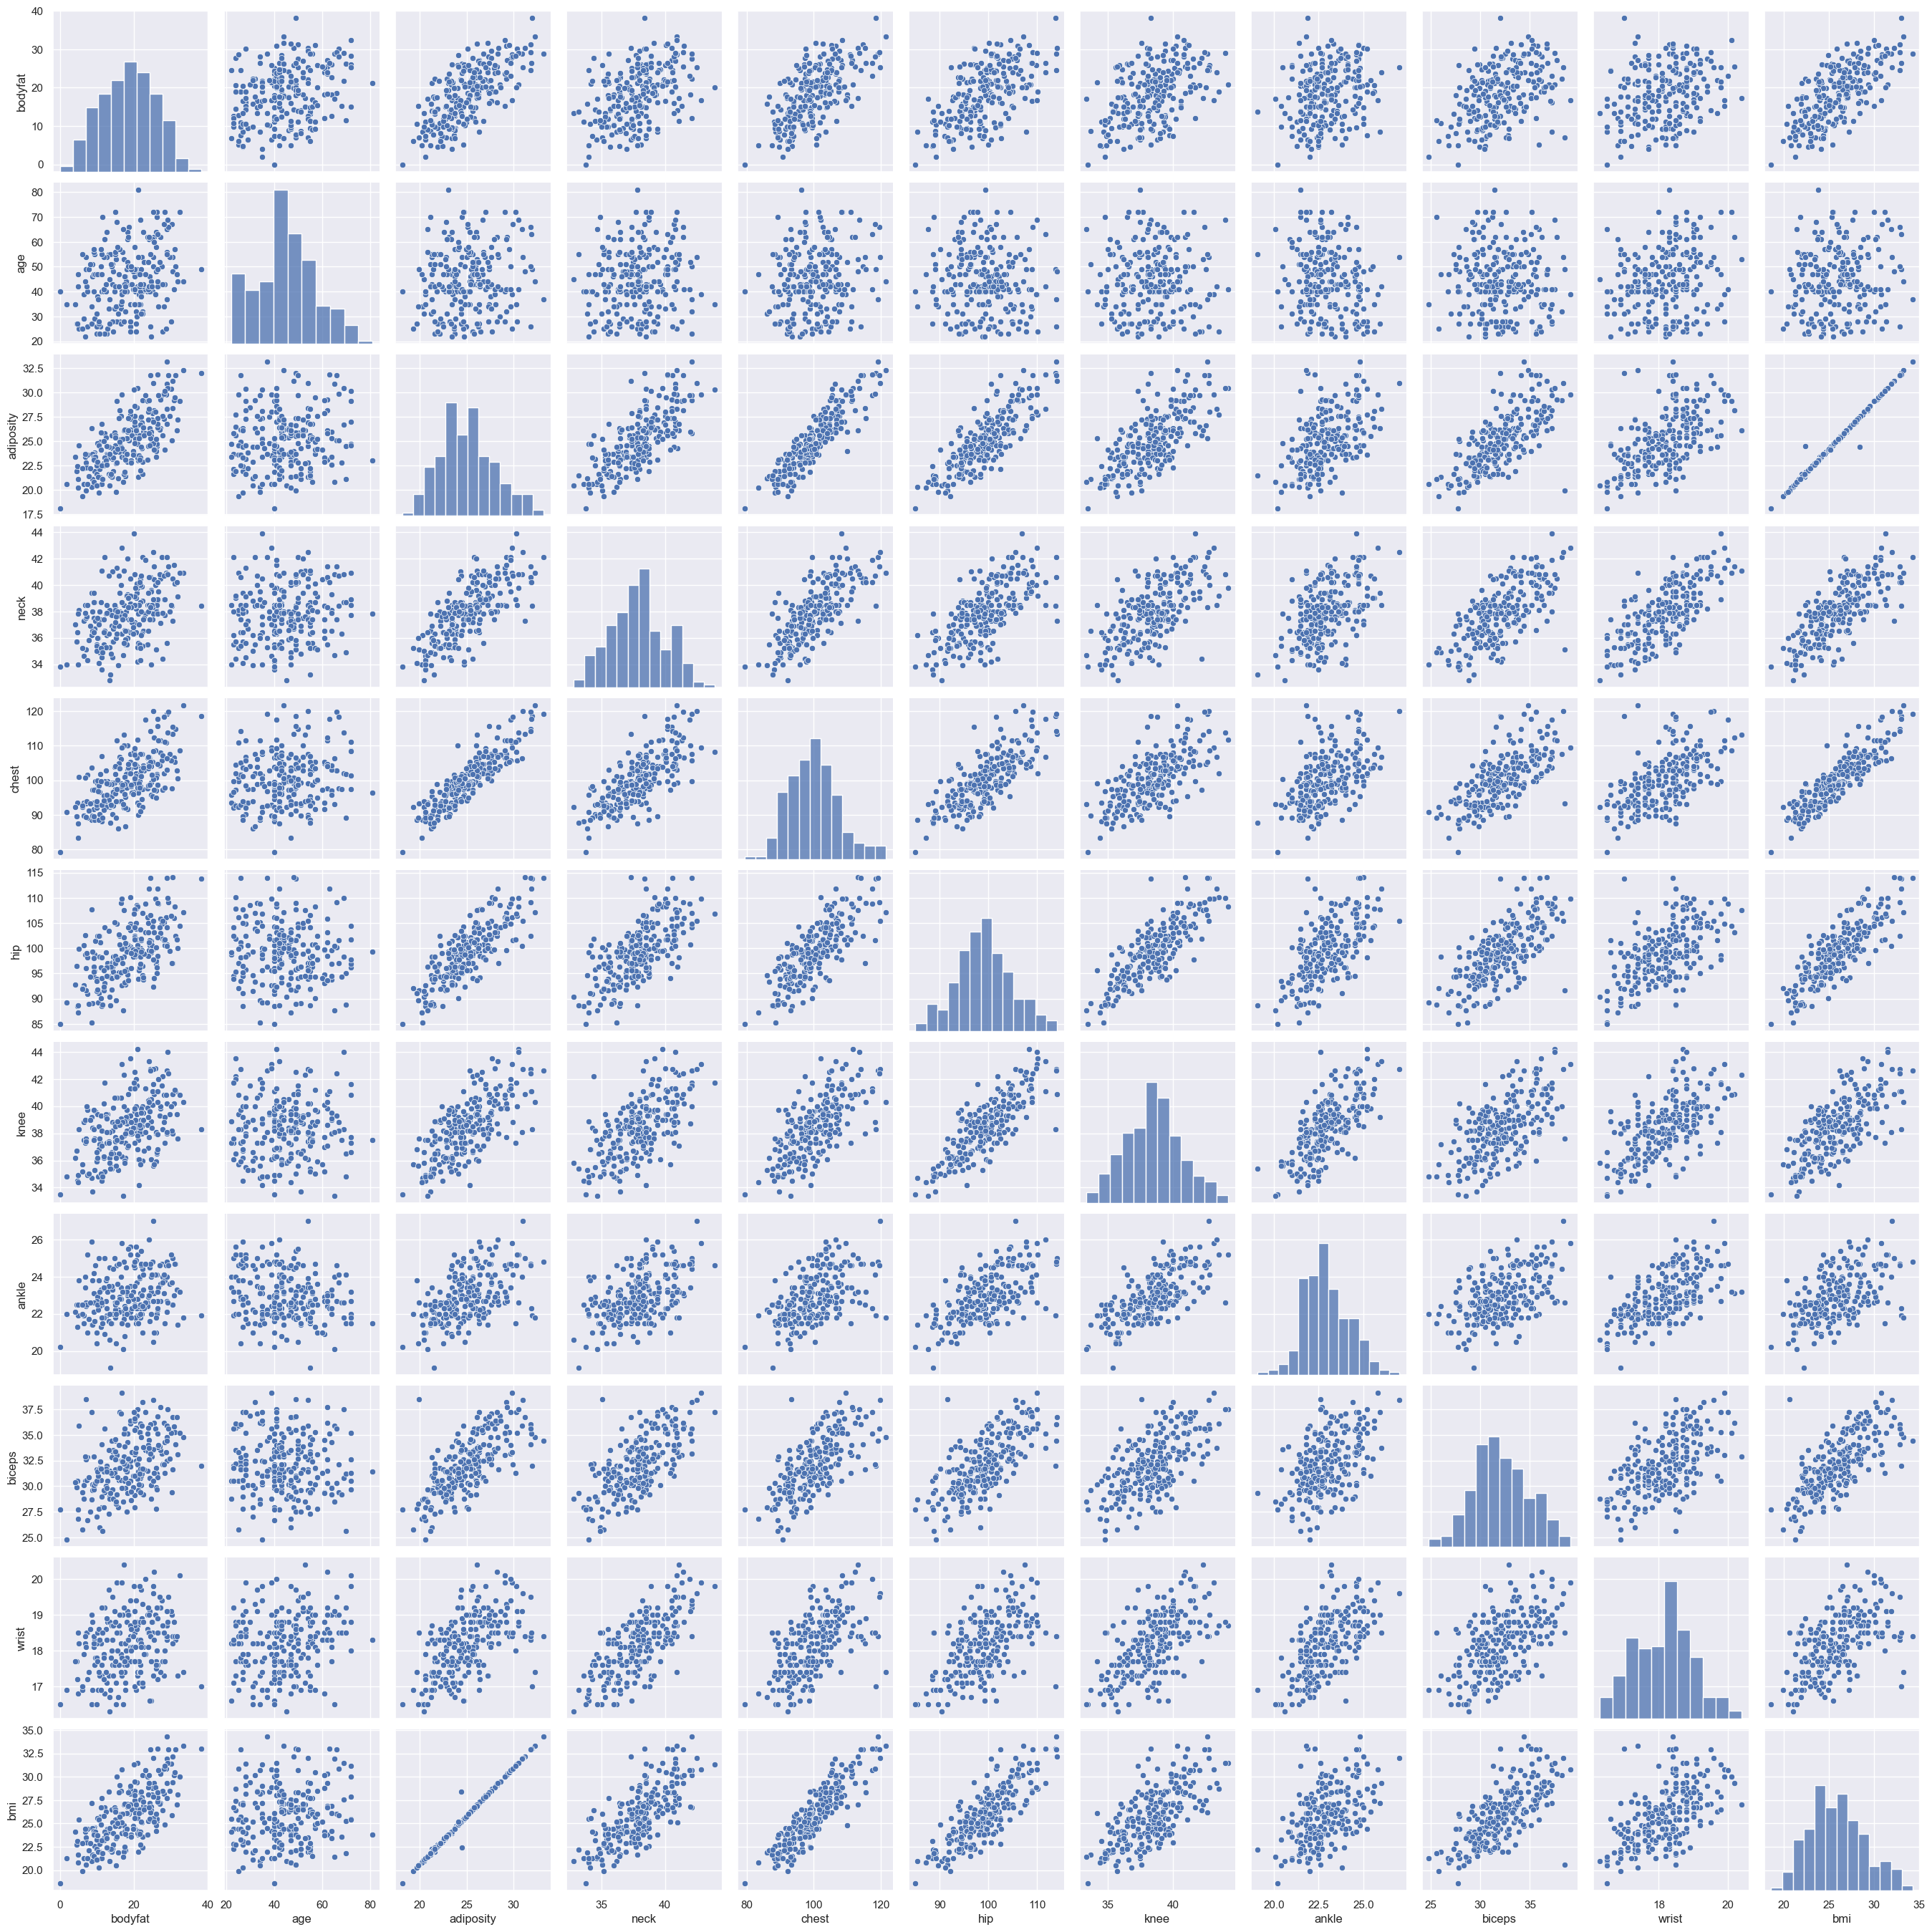

In [89]:
sns.pairplot(final_data)

In [90]:
# Defining the dependent and independent variables 
y = final_data['bodyfat']
x = final_data.drop(['bodyfat'],axis=1)

In [91]:
x

,age,adiposity,neck,chest,hip,knee,ankle,biceps,wrist,bmi
0,23,23.7,36.2,93.1,94.5,37.3,21.9,32.0,17.1,24.4
1,22,23.4,38.5,93.6,98.7,37.3,23.4,30.5,18.2,24.1
2,22,24.7,34.0,95.8,99.2,38.9,24.0,28.8,16.6,25.5
3,26,24.9,37.4,101.8,101.2,37.3,22.8,32.4,18.2,25.7
4,24,25.6,34.4,97.3,101.9,42.2,24.0,32.2,17.7,26.4
...,...,...,...,...,...,...,...,...,...,...
246,69,30.5,40.8,113.7,110.0,44.0,22.6,37.5,18.8,31.5
247,70,21.1,34.9,89.2,88.8,34.8,21.5,25.6,18.5,21.8
248,72,29.1,40.9,108.5,104.5,40.8,23.2,35.2,20.1,30.0
249,72,30.2,38.9,111.1,101.7,37.3,21.5,31.3,18.0,31.2


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [93]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

In [94]:
#Yeo-Johnson Power Transformation inflates low variance data and deflates high variance data to create a more uniform dataset.

In [95]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [96]:
kernel = KernelRidge()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,grad,sgd,bay,random,kernel]
hashmap={}

In [97]:
from sklearn.metrics import mean_squared_error
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

In [98]:
for i in clf:
    compute(i)

In [99]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)


In [100]:
score

,R2_score,RMSE
SGDRegressor(),0.530330,4.765749
BayesianRidge(),0.529694,4.768971
Ridge(),0.524699,4.794233
LinearRegression(),0.522767,4.803965
RandomForestRegressor(),0.502941,4.902737
GradientBoostingRegressor(),0.480687,5.011287
Lasso(),0.474461,5.041235
ElasticNet(),0.466646,5.078582
KernelRidge(),-6.686101,19.279137
